# 1. Empirisches Projekt
---
### **Skript zu Daten Manipulation, Visulallisierung und zur Regressions Analyse**

Dieses Sktipt soll euch helfen eine Datenanalyse sowie eine Simple oder eine Mutiple Regression aufzubauen.
-> Falls ihr fragen habt bitte sagt mir bescheid ich helfe gerne aus!

> E-Mail: riccardo.dandrea@live.de
> Ihr könnte gerne eine Mail schreiben wo wir uns Per zoom treffen können, falls ihr schwierigkeiten habt bei der Programmierung:
> BITTE schreibt in der MAIL:
> - Was habt ihr vor ?
> - Wo liegt das Problem mit Code und Fehlermeldung
> - und wann ihr euch Per zoom treffen wollt Tag und Uhrzeit.





Für die Datenanalyse kann als unterstützung der Leitfaden "Leitfaden.ipynbn" als unterstützung genutzt werden.
Ab Punkt 2. wird erklärt wie Libaries installiert werden und wie die Daten eingelesen werden können. Sowie weitere Schritte zur Datenanalyse.

# Google Colab:
---
##### 1. [Python Programmierung mit Google Colab link](https://colab.research.google.com/drive/1KXsA9WTFS9AxezEEaI3gYirv42b5-0rb#scrollTo=VJul2ijN-eHj)

<img src="Pictures_for_Explanation/1_Google_Colab_Starten.png" alt="Bildbeschreibung" width="700"/>



##### 2. Um ein Skript zu öffnen Navigiert auf Datei was oben Rechts vorzufinden ist und klickt "Notebook öffnen"

<img src="Pictures_for_Explanation/2_Datei_Optionen_öffnen.png" alt="Bildbeschreibung" width="700"/>

##### 3. Danach geht ihr  auf Github und fügt folgenden Link hinzu https://github.com/RiccardoDAndrea/Python-Crashkurs

<img src="Pictures_for_Explanation/3_Zuletzt_Geöffnet.png" alt="Bildbeschreibung" width="700"/>

##### 4. Nachdem Laden werdet ihr mehere Datein wie Skripte vorfinden.
<img src="Pictures_for_Explanation/4_Github_URL_eingeben.png" alt="Bildbeschreibung" width="700"/>

##### 5. Für die Mutiple Lineare Regression wählt ihr Python_MLR.ipynb und somit habt ihr erfolgreich das Skript zur bearbeitung eingeladen
<img src="Pictures_for_Explanation/5_Python_MLR.png" alt="Bildbeschreibung" width="700"/>


In [1]:
import os
if not os.path.exists("Data"):
    print("Ordner Data erstellt")
    os.makedirs("Data") 
elif os.path.exists("Data"):
    print("Ordner Data ist bereits vorhanden")


if not os.path.exists("MLR_Output"):
    print("Ordner Data erstellt")
    os.makedirs("MLR_Output") 
elif os.path.exists("MLR_Output"):
    print("Ordner Data ist bereits vorhanden")

# Erstellt dir ein Ordner wo du deine Daten speichern kannst

Ordner Data ist bereits vorhanden
Ordner Data ist bereits vorhanden


### Füge hier alle benötigten Libaries ein:
---

In [2]:
import importlib
import subprocess
import sys

def install_and_import(package):
    try:
        # Überprüfen, ob das Paket bereits installiert ist
        importlib.import_module(package)
        print(f"'{package}' ist bereits installiert.")
    except ImportError:
        # Falls das Paket nicht installiert ist, wird es installiert
        print(f"'{package}' wird installiert.")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])


install_and_import('scipy')  # Ersetzt 'numpy' mit dem gewünschten Paketnamen

'scipy' ist bereits installiert.


## Manuelle Installation 
---

In [3]:
# %pip install pandas
# %pip install matplotlib
# %pip install seaborn
# %pip install scikit-learn


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
import numpy as np

#### Lese hier deine Daten ein:
---

gebe dazu in den "`Path to your file"` wo deine Datei liegt, sowie den passenden Seprator

In [5]:
df = pd.read_csv(filepath_or_buffer= "Data/wage.csv", sep="\t")

In [6]:
df.head()

,wage,educ,exper,metro
0,2.07,12,7,1
1,2.12,12,35,1
2,2.54,16,20,1
3,2.68,12,24,1
4,3.09,13,4,1


In [7]:
df = pd.read_csv(filepath_or_buffer= "Data/wage_csv.csv", 
                 sep=',')

df.head()

,Unnamed: 0,wage,educ,exper,metro
0,0,2.07,12,7,1
1,1,2.12,12,35,1
2,2,2.54,16,20,1
3,3,2.68,12,24,1
4,4,3.09,13,4,1


#### Begutachte deine Daten:

In [8]:
# gebe dir die ersten 5 reihen des Datensatzes aus:
df.head()

,Unnamed: 0,wage,educ,exper,metro
0,0,2.07,12,7,1
1,1,2.12,12,35,1
2,2,2.54,16,20,1
3,3,2.68,12,24,1
4,4,3.09,13,4,1


In [9]:
Reihen, Spalten = df.shape

# gebe die Anzahl der Reihen und Spalten aus:
print("Anzahl der Reihen: ", Reihen)
print("Anzahl der Spalten: ", Spalten)

Anzahl der Reihen:  998
Anzahl der Spalten:  5


## Anpassung der Datentypen
---
Bevor Daten richtig Manipuliert werden können ist es von wichtigkeit die Datentypen anzupassen.
Welche Datentypen es gibt kannst du im Detail im Leitfaden nachlesen unter Punkt 1.3.

Folgende Datentypen gibt es:

-> `"string"`

-> `"int"`

-> `"float"`

-> `"bool"`

-> `"category"`

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  998 non-null    int64  
 1   wage        998 non-null    float64
 2   educ        998 non-null    int64  
 3   exper       998 non-null    int64  
 4   metro       998 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 39.1 KB


Wir können auch *Datentypen* von Spalten ändern, um die Analyse zu erleichtern.

- *Datentypen* sind wichtig für die Analyse, da sie bestimmen, welche Operationen auf den Daten durchgeführt werden können.

Wenn wir ein `String` statt ein `int` haben können wir keine Rechen Operationen durchführen. 
Wie Mittelwert, Median, Standardabweichung, Varianz, etc.

- Daher ist es wichtig die *Datentypen* zu kennen und zu ändern.

In [11]:
#df['metro'] = df['metro'].astype('category')

Im folgenden Code wirst du eine Statitische Zusammenfassung des Datensatzes erhalten.
Nimm dir eigene Minuten Zeit dein Daten satz zu analysieren und die wichtigsten Informationen herauszufinden.

- Hinterfrage deine Daten und versuche Zusammenhänge zu finden.

In [12]:
print(df.describe().round(2))


# save output of the describtion as a text file
with open('MLR_Output/Summary statistics.txt', 'w') as f:
    f.write(df.describe().round(2).to_string()) 

       Unnamed: 0    wage    educ   exper   metro
count      998.00  998.00  998.00  998.00  998.00
mean       498.50   10.23   13.29   18.79    0.81
std        288.24    6.24    2.47   11.32    0.39
min          0.00    2.07    1.00    0.00    0.00
25%        249.25    5.53   12.00   10.00    1.00
50%        498.50    8.82   13.00   18.00    1.00
75%        747.75   12.84   16.00   26.00    1.00
max        997.00   60.19   18.00   52.00    1.00


Umgang mit NaN-Werten (Not a Number):
---
NaN Werte sind Daten die nicht richtig erhoben worden oder auch fehler enthalten

Beim Umgang mit fehlenden Werten in der Spalte "educ" (Bildungsjahre) sollte eine besonders sorgfältige Vorgehensweise angewendet werden.

**Frage: Kann man fehlende Werte in der Spalte "educ" sinnvoll ersetzen?**

Antwort: *Ja, aber mit Vorsicht.* 
Die Anzahl der Bildungsjahre kann möglicherweise durch den `Durchschnitt`, `Median` oder `Modus` ersetzt werden, aber dies muss mit Bedacht erfolgen. Der Grund ist, dass Bildung ein stark individueller Faktor ist und eine pauschale Ersetzung (z.B. mit dem `Mittelwert`) die Daten verfälschen könnte.
Wenn fehlende Werte in `"educ"` durch den Durchschnitt oder eine andere aggregierte Statistik ersetzt werden, kann dies dazu führen, dass wichtige individuelle Unterschiede verwischt werden. Das könnte letztlich das Modell in die Irre führen, da die Annahmen über die Bildungsjahre nicht korrekt widergespiegelt werden. Eine solche Verzerrung könnte die Ergebnisse von Modellen wie der Regressionsanalyse oder anderen maschinellen Lernverfahren erheblich beeinflussen und zu ungenauen Vorhersagen führen.

Statt pauschaler Ersetzungen sollten im besten Fall Strategien wie:

- Datenquellen ergänzen, um fehlende Werte zu rekonstruieren,
- Imputation mit verwandten Variablen (z.B. Alter, Berufserfahrung), oder
- Löschen betroffener Zeilen, wenn der Anteil fehlender Werte gering ist,
in Betracht gezogen werden, um die Verzerrung minimal zu halten.

In [13]:
df.isnull().sum()

Unnamed: 0    0
wage          0
educ          0
exper         0
metro         0
dtype: int64

In [14]:
# Entferne Zeilen mit fehlenden Werten (NaN)
df = df.dropna()


# Fülle NaN-Werte mit dem Durchschnitt jeder Spalte
#df = df.fillna(df.mean())


# Alternativ: Fülle NaN-Werte einer bestimmten Spalte (z.B. 'Wage') mit deren Durchschnitt
df['wage'] = df['wage'].fillna(df['wage'].mean())

## Filterung der Daten
---

Mit der Datenfilterung kannst du neue Einsichten für deine Daten erhalten.
Diese können wiederum in einer neuen `Variable` eingespeichert werden.

- `df`: Der DataFrame, der die ursprünglichen Daten enthält.

- `df["wage"] > 12.00`: Die Filterbedingung. Es wird überprüft, ob der Wert in der Spalte "wage" größer als 12.00 ist.

- `df[df["wage"] > 12.00]`: Das Ergebnis ist ein neuer DataFrame (df_filtered), der nur die Zeilen enthält, in denen der Wert in der Spalte "wage" größer als 12.00 ist.

In [15]:
df_filtered = df[df["wage"] > 12]
df_filtered

,Unnamed: 0,wage,educ,exper,metro
698,698,12.020000,18,8,1
699,699,12.030000,16,1,1
700,700,12.030000,12,17,1
701,701,12.030000,16,14,1
702,702,12.030000,16,9,1
...,...,...,...,...,...
993,993,35.419998,18,23,1
994,994,36.840000,16,7,1
995,995,41.320000,16,11,1
996,996,47.220001,18,35,1


2. Filterung mit mehreren Konditionen

In [16]:
df_filtered_educ = df[(df["wage"] > 12)  &  # Beachte das du nun deine gewünschte Spalten namen hinzufügen musst
                      (df["educ"] == 12) & 
                      (df["metro"] == 0) &
                      (df["exper"] > 1)] 

df_filtered_educ

,Unnamed: 0,wage,educ,exper,metro
723,723,12.400000,12,25,0
760,760,13.100000,12,24,0
810,810,14.730000,12,42,0
862,862,16.209999,12,29,0
866,866,16.370001,12,22,0
902,902,18.330000,12,40,0
975,975,26.980000,12,45,0


# Visualisierungen:
---

Visualisierungen sind leicht zu erstellen und bieten oft wertvolle Einblicke in die Daten, die möglicherweise anders ausfallen, als zunächst erwartet.

Sie sind besonders wichtig, da sie nicht nur helfen, die Ergebnisse des Regressionsmodells besser zu verstehen, sondern auch dazu beitragen können, die Vorhersagen anschaulich zu untermauern. Wie genau Visualisierungen die Aussagekraft der Modellierung unterstützen, werden wir nach der Durchführung und dem Testen der Regression näher betrachten.


Für die Visualisierung nutzen wir `Seaborn`, für die Beschriftungen nutzen wir `Matplotlib`.

### Korrelations Matrix
---



Im folgenden erstellen wir eine Korrelations Matrix.
Wir verwenden die Daten um diese zu Visualisieren in einer Heatmap.

- `df.corr()` initialisiert die Korrelations Matrix.
- `method = "pearson"` bestimmt welcher Methode die berechnungen durch geführt werden sollen. Folgenden Methoden sind möglich: `pearson, kendall, spearman`
- `nummeric_only = True` berechnet nur die Korrelation von nummerischen werte wie Int oder Float

In [17]:
df.corr(method = "pearson", numeric_only=True)

,Unnamed: 0,wage,educ,exper,metro
Unnamed: 0,1.000000,0.884076,0.462123,0.162591,0.106319
wage,0.884076,1.000000,0.449848,0.148045,0.118225
educ,0.462123,0.449848,1.000000,-0.182577,0.065750
exper,0.162591,0.148045,-0.182577,1.000000,-0.037250
metro,0.106319,0.118225,0.065750,-0.037250,1.000000


Nachdem wir eine Korrelationsmatrix erstellt haben, können wir diese in einer Heatmap visualisieren.

- `sns.heatmap()` erstellt eine Heatmap
- `df.corr(method = "pearson", numeric_only=True)` gibt die Korrelationsmatrix zurück
- `annot = True` zeigt die Werte in der Heatmap an

- `plt.savefig("Vis/Title_")` speichert unsere Heatmap in den Ordner `Vis` mit dem Namen `Title_` als Name

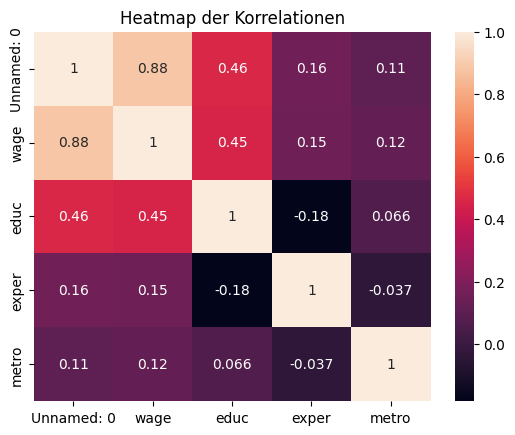

<Figure size 640x480 with 0 Axes>

In [18]:
sns.heatmap(data = df.corr(method = "pearson", numeric_only=True), 
            annot=True) 
plt.title("Heatmap der Korrelationen")
plt.show()
plt.savefig("MLR_Output/Title_.png")

## Boxplot
---
Der Code bleibt größtenteils gleich:

- `sns.barplot()` initialisiert ein Balkendiagramm
    - `data = df` Die Visualisierung werden die Datena aus der Variable df entommen 
    - `x = "wage"` nimmt die Daten aus dem DataFrame und wählt die Spalte "wage" aus
    - `hue = "metro"` gruppierung der Daten in unseren Fall nach Metro
    - `gap = 0.5` erstellt eine Lücke zwischen beide Boxplots
- `plt.title("Boxplot von Erfahrung und Lohn")`
- `plt.grid(True)` fügt Gitterlinien hinzu
- `plt.savefig("MLR_Output/Title_")` speicher die Visualisierung in den Ordner Vis mit dem Titel: Title_

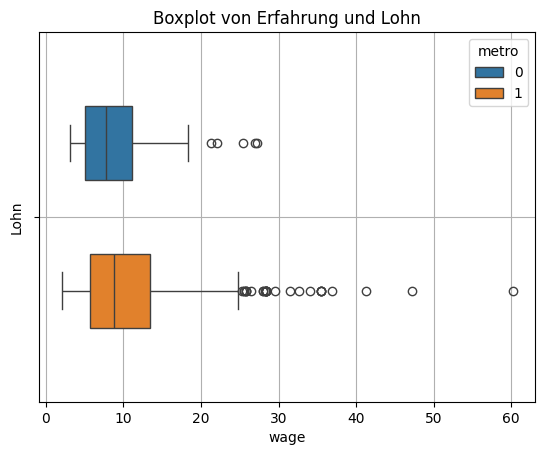

In [19]:
sns.boxplot(data = df, x = "wage", hue = "metro", gap = 0.5)
plt.title("Boxplot von Erfahrung und Lohn")
plt.ylabel("Lohn")
plt.grid(True)
plt.savefig("MLR_Output/Title_") 
plt.show()

## Scatterplot
---

Um ein Scatterplot zu erstellen, wird folgende Funktion verwendet
- `sns.scatterplot()` initiiert ein Scatterplot mit folgenden Parameter:
    - `data = df`                         # der Scatterplot verwendet die Daten von dein Variable `df`
    - `x = "exper"`                       # Die X-Achse nutz die Daten auf dem Dataframe `exper`
    - `y = "wage"`                        # Die Y-Achse nutz die Daten auf dem Dataframe `wage`
    - `alpha = 0.5` # fügt eine Transparenz hinzu die uns hilft konzentrierte Stellen zu erkennen.

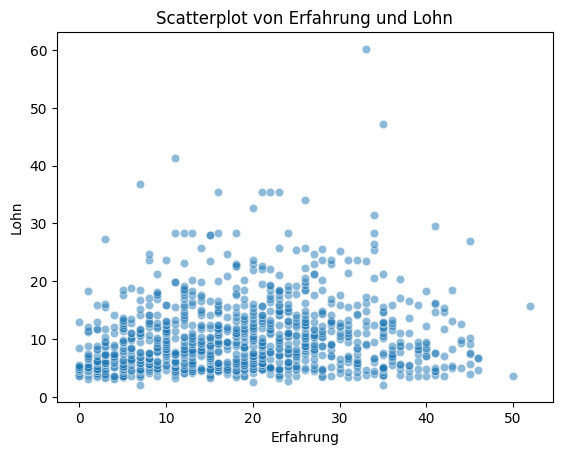

In [20]:
sns.scatterplot(data=df, x="exper", y="wage", alpha = 0.5) # alpha fügt transparenz hinzu
plt.xlabel("Erfahrung")
plt.ylabel("Lohn")
plt.title("Scatterplot von Erfahrung und Lohn")
plt.savefig("MLR_Output/Title_") 
plt.show()

## Balkendiagramm
---

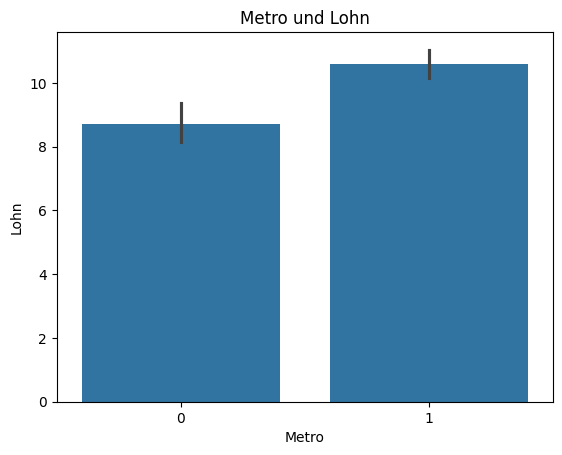

In [21]:
sns.barplot(data=df, x="metro", y="wage")
plt.xlabel("Metro")
plt.ylabel("Lohn")
plt.title("Metro und Lohn")
plt.savefig("MLR_Output/Title_")
plt.show()

## Histogramm
---

Erklärung des Codes:

1. Wir erstellen den Graphen durch `sns.histplot()`
    
    Parameter: 
    - `data = df["wage"]` wir geben den Parameter die Spalte `"wage"` mit um den Histogramm mit Daten zufüllen
    - `bins=30`  erwartet ein integer in wie viele Gruppen `"wage"` unterteilt werden sollen
    
2. Durch Matplotlib fügen wir die Achsenbeschriftung hinzu.
    - `plt.xlabel("Lohn")` gibt der X-Achse die beschriftung "Lohn"
    - `plt.ylabel("Anzahl")` gibt der Y-Achse die beschriftung "Anzahl"
    - `plt.title("Histogramm des Lohns")` gibt den Graphen den Titel "Histogramm des Lohns"
    - `plt.title("Histogramm des Lohns")
    - `plt.xticks(np.arange(0, 70, step=10))` verändert die Skalierung der X-Achse indem wir sagen `np.arange(0,70, step = 10)`. Das heißt der niedrigste Wert ist 0 der höchste 70 auf der X-Achse in 10 Schritte wiedergeben
    
    - `plt.yticks(np.arange(0, 260, step=50))` verändert die Skalierung der Y-Achse indem wir sagen `np.arange(0,260, step = 50)`. Das heißt der niedrigste Wert ist 0 der höchste Wert ist 260 auf der Y-Achse in 50 Schritte wiedergeben



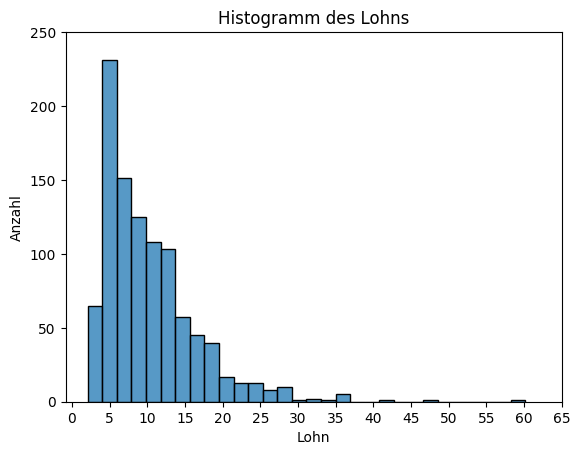

In [22]:
sns.histplot(data=df, x="wage", bins=30)
plt.xlabel("Lohn")
plt.ylabel("Anzahl")
plt.title("Histogramm des Lohns")
plt.xticks(np.arange(0, 70, step=5))
plt.yticks(np.arange(0, 260, step=50))
plt.savefig("MLR_Output/Title_")
plt.show()

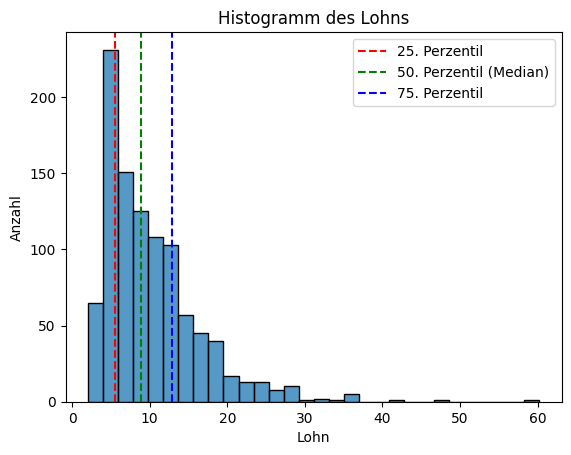

In [23]:
# Berechne die Perzentile (25., 50., 75.)
q25_wage = np.percentile(df['wage'], 25)
q50_wage = np.percentile(df['wage'], 50)  # Median
q75_wage = np.percentile(df['wage'], 75)

# Plot der Verteilung
sns.histplot(df['wage'], bins=30)

# Füge die vertikalen Linien für die Perzentile hinzu
plt.axvline(x=q25_wage, color='red', linestyle='--', label='25. Perzentil')
plt.axvline(x=q50_wage, color='green', linestyle='--', label='50. Perzentil (Median)')
plt.axvline(x=q75_wage, color='blue', linestyle='--', label='75. Perzentil')

# Plot-Details
plt.legend()
plt.xlabel("Lohn")
plt.ylabel("Anzahl")
plt.title("Histogramm des Lohns")
plt.savefig("MLR_Output/Title_") 
plt.show()

### Pairplot
---
Erstellt ein Visualisierung zwischen den Beziehungen der Daten

`sns.pairplot(df)`
- `hue = "metro"` gruppiert die Daten nach Metro

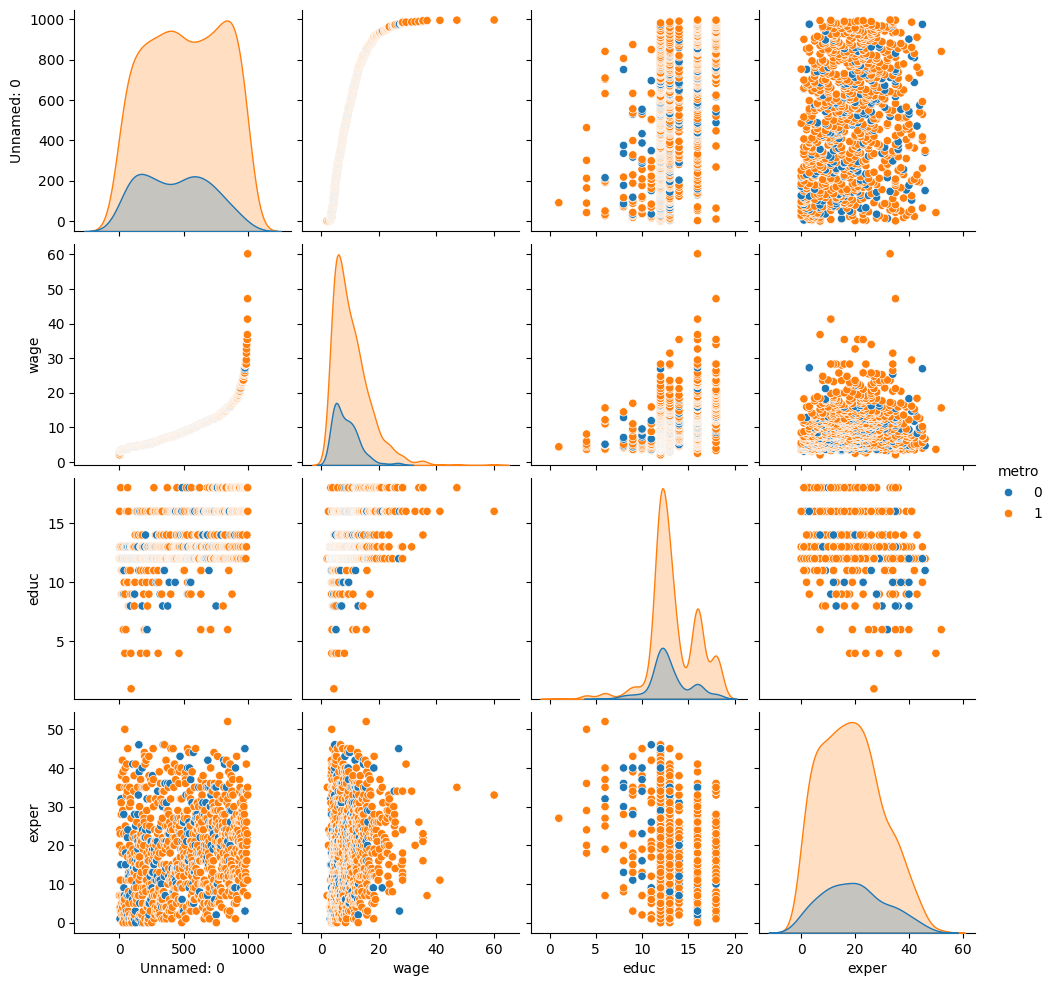

In [24]:
sns.pairplot(df, hue = "metro")
plt.savefig("MLR_Output/Title_") 
plt.show()

### Simple Lineare Regression Visualisieren
---

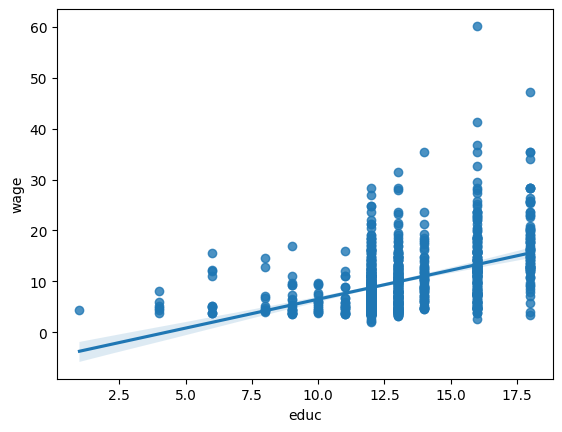

In [25]:
sns.regplot(data = df, x="educ", y ="wage")
plt.savefig("MLR_Output/Title_") 
plt.show()

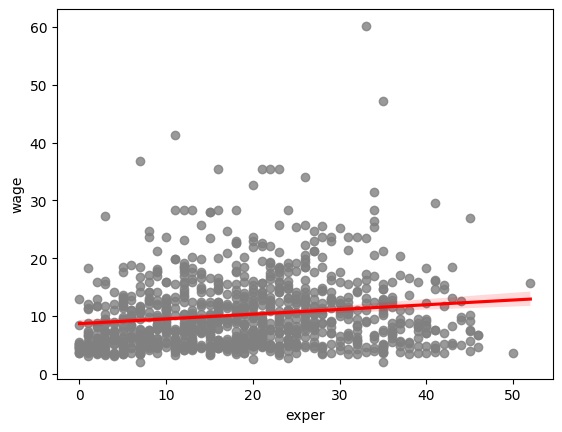

In [26]:
sns.regplot(data = df, x="exper", y ="wage", scatter_kws={'color': 'grey'}, line_kws={'color': 'red'})
plt.savefig("MLR_Output/Title_") 
plt.show()

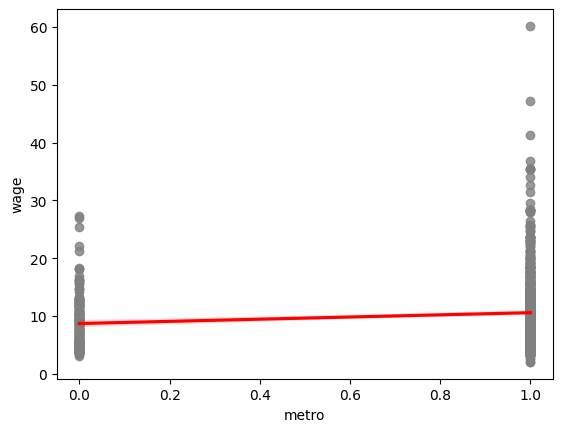

In [27]:
sns.regplot(data = df, x="metro", y ="wage", scatter_kws={'color': 'grey'}, line_kws={'color': 'red'})

plt.savefig("MLR_Output/Title_") 
plt.show()

## Regressions Analyse
---
Im folgenden erstellen wir nun eine Mutiple Lineare Regression

#### Formel:
`wage ~ educ + exper + metro`

In [28]:
import statsmodels.api as sm
from statsmodels.formula.api import ols 
import sklearn as sk
import warnings
warnings.filterwarnings('ignore')

## Lege deine abhängige und unabhängige Variable fest

- In der `Variable X` erstellen wir ein neues Dataframe nur mit den Spalten educ, exper, metro (abhängige Variable)

- In der `Variable Y` erstellen wir ein neues Dataframe nur mit den Spalte wage die wir demenstsprechend auch vorhersagen möchten (unabhängige Variable)


In [29]:
X = df[["educ", "exper", "metro"]] 
y = df["wage"]

### Erstellung der Regression:
Regressionen können auf viele wege erstellt werden wir arbeiten nun mit dem Package `Statsmodels` da diese viele Metriken uns wiedergeben mit weniger Code

1. Möglichkeit:

In [30]:
X = sm.add_constant(X)
X.head()

,const,educ,exper,metro
0,1.0,12,7,1
1,1.0,12,35,1
2,1.0,16,20,1
3,1.0,12,24,1
4,1.0,13,4,1


In [31]:
model_stats = sm.OLS(y, X)
model = model_stats.fit()

In [32]:
print(model.summary())

with open('MLR_Output/Regression_summary.txt', 'w') as fh:
    fh.write(model.summary().as_text()) # Speicher dein Regressions Ergebnis in einer Text Datei in dem Odner Regression Output

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     120.2
Date:                Sun, 06 Oct 2024   Prob (F-statistic):           2.06e-66
Time:                        16:35:08   Log-Likelihood:                -3089.0
No. Observations:                 998   AIC:                             6186.
Df Residuals:                     994   BIC:                             6206.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.8581      1.077     -9.154      0.0

Formel: y_hat = intercept + b1 * educ + b1 * exper + b1 * educ + b1 * metro

### 2. Möglicheit die mehr an R erinnert:

In [33]:
model = ols('wage ~ educ + exper + metro', 
                   data=df).fit()

print(model.summary())

# with open('MLP_Output/Regression_summary.txt', 'w') as fh:
#     fh.write(model.summary().as_text()) # Speicher dein Regressions Ergebnis in einer Text Datei in dem Odner Regression Output

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     120.2
Date:                Sun, 06 Oct 2024   Prob (F-statistic):           2.06e-66
Time:                        16:35:08   Log-Likelihood:                -3089.0
No. Observations:                 998   AIC:                             6186.
Df Residuals:                     994   BIC:                             6206.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.8581      1.077     -9.154      0.0

In [34]:
model.params

Intercept   -9.858057
educ         1.232183
exper        0.132734
metro        1.509102
dtype: float64

## Konfidenz Intervalle:
---

In [35]:
conf_intervals = model.conf_int(alpha=0.05, cols=None).round(3) # 95% Konfidenzintervalle
conf_intervals.columns = ['0.5 %', '99.5 %']  # Umbenennen der Spalten
conf_intervals

,0.5 %,99.5 %
Intercept,-11.971,-7.745
educ,1.095,1.369
exper,0.103,0.163
metro,0.661,2.357


## Vorhersagen treffen:

In [36]:
prediction = model.predict(X)

# Die ersten 5 Vohersagen, um alle zu sehen entferne die [:5]
prediction[:5]

0     7.366383
1    11.082949
2    14.020664
3     9.622870
4     8.200363
dtype: float64

In [37]:
Intercept = model.params[0]
educ_1 = model.params[1]
exper_2 = model.params[2]
metro_3 = model.params[3]

print("Intercept: ", Intercept)
print("educ: ", educ_1)
print("exper: ", exper_2)
print("metro: ", metro_3)

Intercept:  -9.858056885638929
educ:  1.2321830326769871
exper:  0.1327344991515764
metro:  1.5091022459527108


In [38]:
# Regressionsformel als String formatieren
formula = f'wage = {Intercept:.3f} + {educ_1:.3f}*educ + {exper_2:.3f}*exper + {metro_3:.3f}*metro'
formula

'wage = -9.858 + 1.232*educ + 0.133*exper + 1.509*metro'

In [39]:
educ = 12
exper = 12
metro = 1

result = Intercept + educ_1 * educ + exper_2 * exper + metro_3 * metro
print("Das Vorhergesagte Einkommen: ", result)

Das Vorhergesagte Einkommen:  8.030055742256543


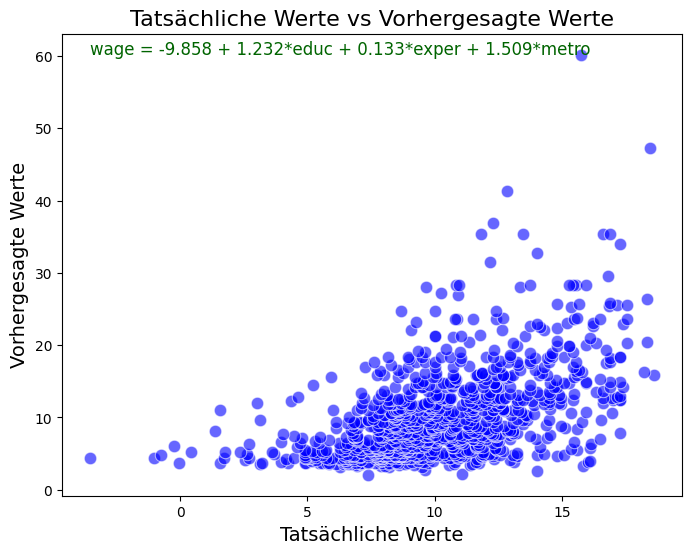

In [40]:
# Scatterplot erstellen (Farben und Transparenz anpassen)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=prediction, y=y, alpha=0.6, color="blue", edgecolor="w", s=80)  # s=80 macht die Punkte größer

# Plot-Titel und Achsenbeschriftungen
plt.title("Tatsächliche Werte vs Vorhergesagte Werte", fontsize=16)
plt.xlabel("Tatsächliche Werte", fontsize=14)
plt.ylabel("Vorhergesagte Werte", fontsize=14)

# Die Regressionsformel in die Grafik einfügen
plt.text(x=min(prediction), y=max(y), s=formula, fontsize=12, color='darkgreen', ha='left')

# Plot anzeigen und speichern

plt.savefig("MLR_Output/Title_Actual_vs_Predicted_with_formula.png", dpi=300)
plt.show()


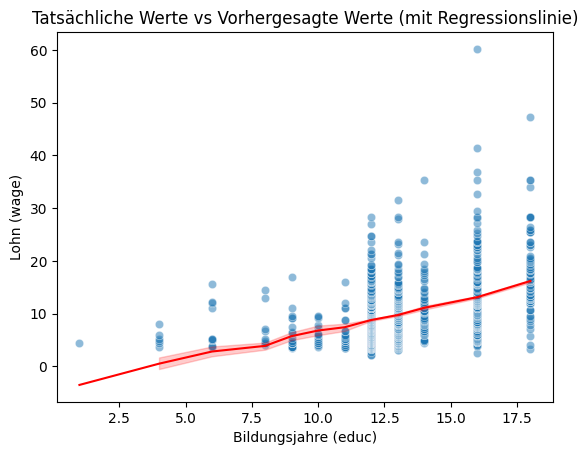

In [41]:
# Scatterplot für educ gegen wage
sns.scatterplot(x=df["educ"], y=df["wage"], alpha=0.5)

# Regressionslinie hinzufügen
sns.lineplot(x=df["educ"], y=prediction, color='red')

plt.title("Tatsächliche Werte vs Vorhergesagte Werte (mit Regressionslinie)")
plt.xlabel("Bildungsjahre (educ)")
plt.ylabel("Lohn (wage)")

plt.savefig("MLR_Output/educ_vs_wage_with_regression_line.png")
plt.show()


## Residuale 
---

### Residuale berechen
Um Resiudale zu berechnen haben wir zwei möglichkeiten.

1. Möglichkeit durch eine eingbaute Funktion:

In [42]:
residuals = model.resid
residuals

0      -5.296383
1      -8.962949
2     -11.480664
3      -6.942870
4      -5.110363
         ...    
993    18.536765
994    24.544885
995    28.493947
996    28.743954
997    44.443787
Length: 998, dtype: float64

2. Berechnung durchführen ohne eine Funktion:

In [43]:
residuals_model = y - prediction # tatsächliche Werte - Vorhersagen
residuals_model

0      -5.296383
1      -8.962949
2     -11.480664
3      -6.942870
4      -5.110363
         ...    
993    18.536765
994    24.544885
995    28.493947
996    28.743954
997    44.443787
Length: 998, dtype: float64

### Visualisierung der Residuale durch ein Scatterplot

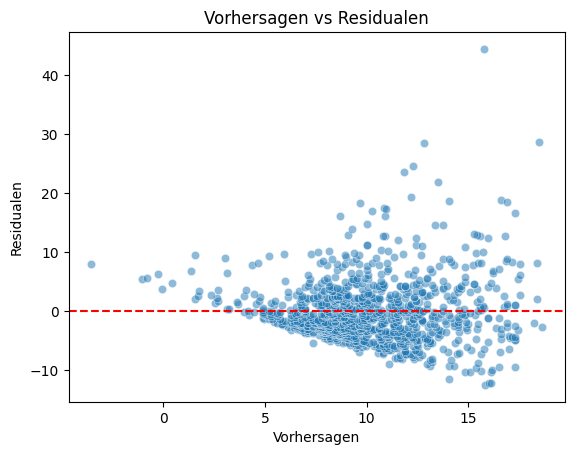

In [44]:
# Scatterplot der Vorhersagen gegen Residualen
sns.scatterplot(x=prediction, y=residuals_model, alpha = 0.5)
plt.title("Vorhersagen vs Residualen")
plt.axhline(y = 0, color = 'r', linestyle = '--') # fügt eine rote horziontale Linie hinzu
plt.xlabel("Vorhersagen")
plt.ylabel("Residualen")

plt.savefig("MLR_Output/Title_Residuals_vs_Predictions.png")
plt.show()

### Visualisierung der Residualen durch Residplot

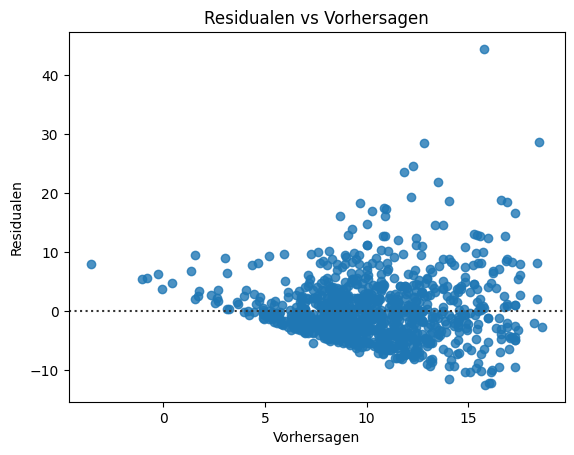

In [45]:
sns.residplot(x=prediction, y=residuals)
plt.title("Residualen vs Vorhersagen")
plt.xlabel("Vorhersagen")
plt.ylabel("Residualen")
plt.savefig("MLR_Output/Title_")
plt.show()

In [46]:
# Berechnung von Summe der quadrierten Residuen (SSR) 
SSResiduals = (residuals**2).sum()
print("SSResiduals:", SSResiduals)  

# SST = Summe der quadrierten Abweichungen der abhängigen Variable vom Mittelwert 
SSTotal = ((y - y.mean())**2).sum()
print("SSTotal:", SSTotal)


# # R-squared
# R_squared = 1 - (SSResiduals/SSTotal)
# print("R_squared:", R_squared)

SSResiduals: 28519.798334292856
SSTotal: 38864.69915546035


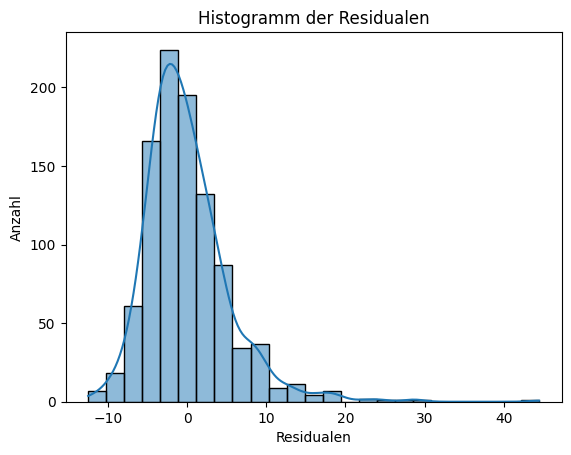

In [47]:
sns.histplot(residuals, kde=True, bins=25)
plt.title("Histogramm der Residualen")
plt.xlabel("Residualen")
plt.ylabel("Anzahl")
plt.savefig("MLR_Output/Title_")
plt.show()

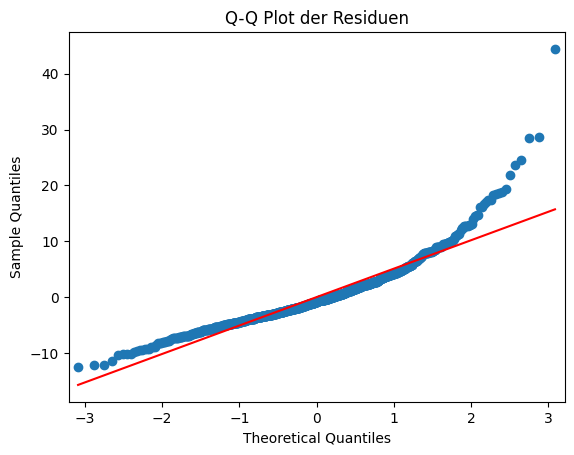

In [48]:
fig = sm.qqplot(residuals, line='r')  # 'r' fügt die Referenzlinie hinzu
plt.title("Q-Q Plot der Residuen")
plt.savefig("MLR_Output/Title_")
plt.show()

### Analysis of variance (Anova)

In [49]:
from statsmodels.stats.anova import anova_lm

# ANOVA-Test durchführen
anova_results = anova_lm(model)  # Typ 2 ANOVA

# Ergebnisse anzeigen
anova_results

,df,sum_sq,mean_sq,F,PR(>F)
educ,1.0,7864.802216,7864.802216,274.111805,1.465272e-54
exper,1.0,2130.117614,2130.117614,74.240950,2.684887e-17
metro,1.0,349.980991,349.980991,12.197881,4.994939e-04
Residual,994.0,28519.798334,28.691950,NaN,NaN


## Heteroskedasticity testen

In [50]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white


In [51]:
bp_lm, bp_lm_pvalue, bp_fvalue, bp_f_pvalue = sm.stats.diagnostic.het_breuschpagan(
    model.resid, model.model.exog)


print(f"LM Statistic: {bp_lm}")
print(f"LM p-value: {bp_lm_pvalue}")
print(f"F Statistic: {bp_fvalue}")
print(f"F p-value: {bp_f_pvalue}")

LM Statistic: 42.76916568859225
LM p-value: 2.7549846935235586e-09
F Statistic: 14.835000842180893
F p-value: 1.872207806675279e-09


In [52]:
ols = sm.OLS(y, X).fit(cov_type="HC1")
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     80.93
Date:                Sun, 06 Oct 2024   Prob (F-statistic):           7.59e-47
Time:                        16:35:09   Log-Likelihood:                -3089.0
No. Observations:                 998   AIC:                             6186.
Df Residuals:                     994   BIC:                             6206.
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.8581      1.213     -8.129      0.0

## Multikollinearität
---

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF Berechnung nur für die Variablen in X
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns

# Berechne den VIF für jede unabhängige Variable
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


  Feature        VIF
0   const  40.340431
1    educ   1.038221
2   exper   1.035169
3   metro   1.005007


### Interpretation Multikollinearität: 
Analyse Multikollinearität:

`const (40.34)`: Dieser Wert ist sehr hoch. Ein hoher VIF-Wert bei der Konstante (Intercept) ist jedoch nicht unbedingt problematisch, da die Konstante nicht direkt in der Modellinterpretation verwendet wird. Oftmals resultiert dies daraus, dass eine konstante Variable wie der Intercept perfekt mit sich selbst korreliert.

`educ (1.04)`, `exper (1.03)`, `metro (1.01)`: Diese VIF-Werte sind sehr niedrig, nahe bei 1. Das bedeutet, dass es kaum Multikollinearität zwischen diesen unabhängigen Variablen gibt. Die Korrelation zwischen diesen Variablen ist minimal.


## Polynomial-Regression
---

In [54]:
from sklearn.preprocessing import PolynomialFeatures

In [58]:
ice_creamdf = pd.read_csv("Data/ice_cream_sales.csv", sep=',')

ice_creamdf.to_csv("Data/ice_cream_sales.csv")


In [ ]:
ice_creamdf.head()

In [ ]:
ice_creamdf.info()

In [ ]:
ice_creamdf.describe()

In [ ]:
ice_creamdf.isna().sum()

In [58]:
X_poly = ice_creamdf["Temperature (°C)"].values.reshape(-1,1)
X_log = sm.add_constant(X_poly)
y_poly = ice_creamdf["Ice Cream Sales (units)"].values

In [ ]:
polynomial_features= PolynomialFeatures(degree=2)
xp = polynomial_features.fit_transform(X_poly)
xp.shape

In [ ]:
model_poly = sm.OLS(y_poly, xp).fit()
ypred_poly = model_poly.predict(xp) 

ypred_poly.shape

In [ ]:
model_poly.summary()

In [ ]:
plt.scatter(X_poly,y_poly)
plt.plot(X_poly,ypred_poly)

plt.title("Polynomiale Regression")
plt.xlabel("Temperatur (°C)")
plt.ylabel("Eisverkäufe (Einheiten)")
plt.savefig("MLR_Output/Title_")
plt.show()

## Log-Log Model:

---

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Beispiel-Daten
data = {
    'X': [1, 2, 3, 4, 5, 6],
    'y': [1, 2, 4, 8, 16, 32]
}

df = pd.DataFrame(data)

# Logarithmieren der Variablen
df['log_X'] = np.log(df['X'])
df['log_y'] = np.log(df['y'])

# Hinzufügen einer Konstante für den Intercept
X_log = sm.add_constant(df['log_X'])

# Erstelle das log-log Modell
model = sm.OLS(df['log_y'], X_log)
results = model.fit()

# Ausgabe der Ergebnisse
print(results.summary())

# Vorhersagen treffen
y_pred_log = results.predict(X_log)
